## 선형 회귀

In [1]:
import numpy as np

In [2]:
np.random.seed(42)

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1) # y = 4 + 3X + 가우시안 노이즈

In [4]:
import matplotlib.pyplot as plt

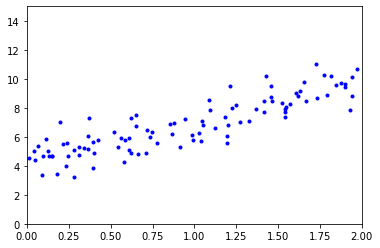

In [7]:
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

* 사이킷런 이용

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [9]:
lin_reg.intercept_

array([4.21509616])

In [10]:
lin_reg.coef_

array([[2.77011339]])

In [11]:
lin_reg.score(X, y)

0.7692735413614223

* 배치 경사하강법

#### - bias(X0 = 1) 추가

In [12]:
X_b = np.c_[np.ones((100, 1)), X]

In [14]:
X[:3]

array([[0.74908024],
       [1.90142861],
       [1.46398788]])

In [15]:
X_b[:3]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788]])

In [16]:
X_b.shape

(100, 2)

In [22]:
eta = 0.1 # 학습률
n_iterations = 1000 # theta update 반복 횟수
m = 100   # 샘플의 개수
theta = np.random.randn(2, 1)

In [23]:
theta

array([[-0.26465683],
       [ 2.72016917]])

In [24]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [25]:
theta

array([[4.21509616],
       [2.77011339]])

* 확률적 경사하강법

In [27]:
n_epochs = 50
t0, t1 = 5, 50
m = 100

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for ephoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(ephoch * m + i)
        theta = theta - eta * gradients

In [28]:
theta

array([[4.18228368],
       [2.72737073]])

In [29]:
from sklearn.linear_model import SGDRegressor

In [39]:
sgd_reg = SGDRegressor(max_iter=50, eta0=0.1, penalty=None, random_state=42)
sgd_reg.fit(X, y.ravel()) # y.ravel() : (100, 1) -> (100,)

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42)

In [40]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

### 다항 회귀

In [41]:
import numpy as np

In [55]:
np.random.seed(42)

In [56]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

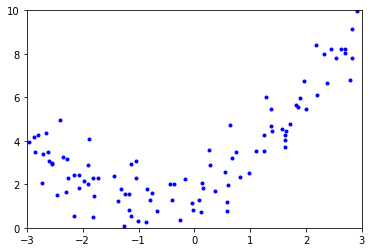

In [57]:
plt.plot(X, y, 'b.')
plt.axis([-3, 3, 0, 10])
plt.show()

In [58]:
from sklearn.preprocessing import PolynomialFeatures

In [59]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(poly_features.get_feature_names())

['x0', 'x0^2']


In [60]:
X[0]

array([-0.75275929])

In [61]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [62]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [63]:
lin_reg.intercept_, lin_reg.coef_      # y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

(array([1.78134581]), array([[0.93366893, 0.56456263]]))